# Контрольная работа :)

In [ ]:
import numpy as np
import pandas as pd

from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot') # стиль для графиков

В файле `cr.csv` лежат результаты контрольной работы.  По мнению студентов эти оценки смещённые, несостоятельные и ужасно неэффективные. Но это уже совершенно другая история. Подгрузим файлик и посмотрим на него!  

In [ ]:
!wget 'https://drive.google.com/u/0/uc?id=1igOUSW8hTA5wToubIa5mh1cFTRRkUgvX' -O "cr.csv"

In [1]:
df = pd.read_csv('cr.csv', sep='\t')
print(df.shape)
df.head()

(389, 20)


       contest_login  fraud   k1a   k1b   k1c   k1d  ...   k2f    k2   k3a   k3b   k3c   k3
0  eds_python_2020_1    0.0  10.0  10.0  20.0  30.0  ...  20.0  11.0  35.0   0.0  27.0  6.2
1  eds_python_2020_2    1.0   9.0  10.0  20.0   NaN  ...  20.0   6.5  35.0  29.0  22.0  8.6
2  eds_python_2020_3    0.0   2.0  10.0  20.0   NaN  ...  20.0   8.5  28.0   2.0   0.0  3.0
3  eds_python_2020_4    1.0  10.0  10.0  20.0   NaN  ...  20.0   9.0  30.0  38.0   0.0  6.8
4  eds_python_2020_5    2.0  10.0  10.0  12.0   0.0  ...  20.0   9.0   0.0   0.0   0.0  0.0

[5 rows x 20 columns]

__Описание колонок:__


* `contest_login` - уникальный идентификатор студента
* `fraud` - в списывании скольки задач был уличён студент 
* `k1` - результат за первую контрольную, `k1a - k1f` в разбивке по задачам
* `k2` - результат за вторую контрольную, `k2a - k2f` в разбивке по задачам
* `k3` - результат за третью контрольную, `k3a - k3с` в разбивке по задачам

__а) Распределение результатов контрольной__ 

- Запишите все оценки за первую контрольную в переменную `x`, все пропуски удалите
- Найдите среднее и стандартное отклонение (используйте несмещённую оценку) 
- Постройте гистограмму результатов за первую контрольную 
- На этой же картинке постройте плотность нормального распределения со средним и стандартным отклонением, посчитанными выше

Похоже ли эмпирическое распределение на нормальное? 

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
Cell In [34], line 11
      7 x_std = x.std(ddof=1)
      9 x.hist(bins=50, density=True)
---> 11 xs = stats.norm(loc=x_mean, scale=x_std).pdf()
     13 pd.Series(xs).plot().kde()

TypeError: rv_frozen.pdf() missing 1 required positional argument: 'x'


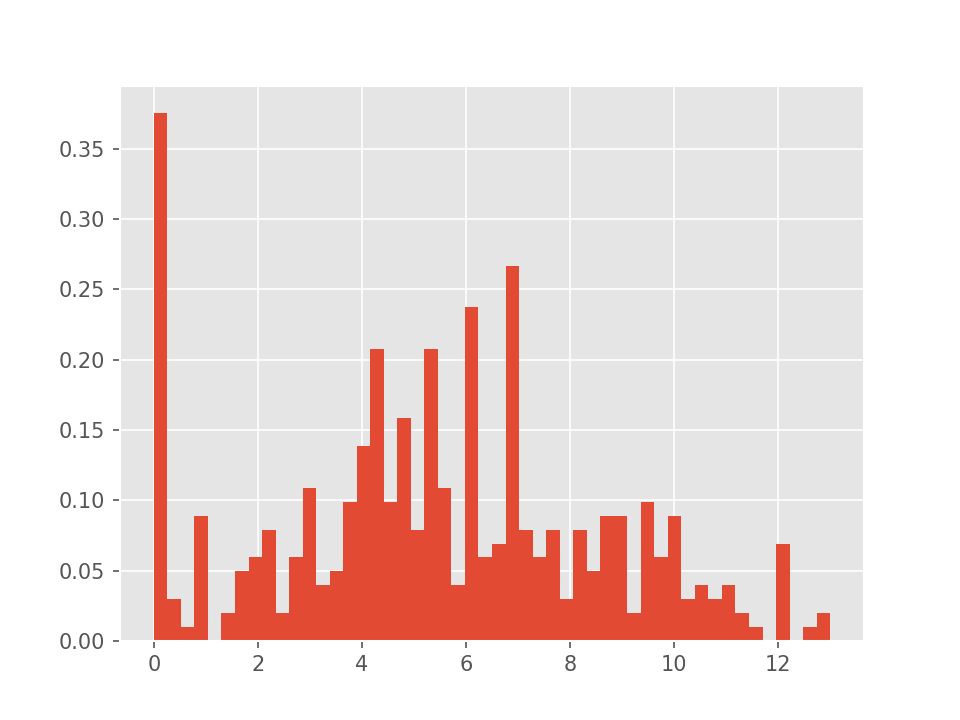

In [2]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

x = df["k1"]

x_mean = x.mean()
x_std = x.std(ddof=1)

x.hist(bins=50, density=True)

xs = stats.norm(loc=x_mean, scale=x_std)

# your code here

In [ ]:
# проверка, что среднее и стандартное откланение посчитаны корректно
assert np.abs(x_mean - 5.4478149100) < 1e-5

По аналогии с тем, как это было сделано на лекции, проверьте с помощью теста Колмогорова-Смирнова гипотезу о нормальности: 

- Используйте функцию `kstest` из пакета `scipy`
- С помощью `.pvalue` вытащите из результатов теста p-значение, запишите его в переменную `pvalue`
- По аналогии запишите в `K` значение статистики Колмогорова
- Если p-значение оказалось больше $0.05$, гипотеза о нормальности данных не отвергается, и мы можем дальше использовать эту предпосылку

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

ktest = stats.kstest(x, "norm", args=(x_mean, x_std))
pvalue = ktest.pvalue
K = ktest.statistic

# your code here

In [ ]:
# проверка, что pvalue найдено корректно
assert np.abs(K - 0.051247) < 1e-5

Предположим невероятное! А именно, независимость и одинаковую распределённость наших наблюдений (никто не списывал контрольную друг у друга).

__б) Интервал для среднего.__ 

Постройте точный $95\%$-й доверительный интервал для ожидамоего результата за первую контрольную.
В качестве оценки стандартного отклонения используйте несмещённый вариант, `ddof=1`.
В переменные `left` и `right` запишите границы получившегося интервала. В переменную `delta` его ширину. 

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

alpha = 0.05

n = x.count()
mu_hat = x.mean()
sd_hat = x.std(ddof=1)/np.sqrt(n)

left, right = stats.t.interval(1 - alpha, df=(n-1), loc=mu_hat, scale=sd_hat)
delta = right - left

In [ ]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left - 5.13247213744281) < 1e-5

__в) Ангелы и демоны__

Переменная`fraud` - в списывании скольки задач был уличён студент.
Разобьём наши наблюдения на две группы: Ангелы и Демоны.
У Ангелов `fraud == 0`, у Демонов `fraud > 0`. 

Запишите оценки за первую контрольную для ангелов в переменную `angels`, для демонов в `demons`.
Все пропуски из выборки удалите.
Постройте на общем фоне гистограмму распределения оценок за первую контрольную у Ангелов и Демонов. 

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

angels = df["k1"][df["fraud"] == 0]
demons = df["k1"][df["fraud"] > 0]

# your code here

In [ ]:
# проверка того, сколько в выборке оказалось ангелов и демонов
assert len(angels) == 109

__г) Интервал для разницы средних__ 

Постройте примерный $95\%$-й доверительный интервал для разницы ожидаемого результата за первую контрольную у Ангелов и Демонов без предположения о равенстве дисперсий (интервал Уэлча). Для оценки всех дисперсий используйте несмещённый вариант. Заполните все переменные, перечисленные ниже. 

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

nu =  ...       # число степеней свободы в распределении Стьюдента
left =  ...     # левая граница интервала
right = ...     # правая граница интервала
delta = ...     # ширина интервала

# your code here

In [ ]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left + 0.2406218787675073) < 1e-5

Входит ли в получившийся доверительный интервал ноль? Как думаете, что это означает? 

__д) Интервал для дисперсии__ 

Предположим, что математическое ожидание результата за контрольную зависит от уровня подготовки, а дисперсия результата — от нервов.
Постройте для отношения нервозности Демонов и Ангелов $95\%$ доверительный интервал.
Для оценки всех дисперсий используйте несмещённый вариант. 

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

alpha = 0.05
left =  ...     # левая граница интервала
right = ...     # правая граница интервала
delta = ...     # ширина интервала

# your code here

In [ ]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left - 0.6120428247687726) < 1e-5

Вошла ли в доверительный интервал единица? Как думаете, что это означает? 

__е) Ангелы и демоны решают задачки__ 

Нарисуйте картинку для корреляционной матрицы по задачам первой контрольной для всех наблюдений, отдельно для Ангелов и Демонов.
Пропуски заполните нулями. Будем считать, что если у студента нет оценки, он не выполнял это задание.
Для подсчёта корреляций используйте метод `.corr`. Для отрисовки матриц функцию `heatmap` из пакета `seaborn`.
Для ангелов неплохо подойдёт цветовая схема `YlGnBu`. Для демонов подходит схема `gist_heat_r`.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

tasks = ['k1a', 'k1b', 'k1c', 'k1d', 'k1e', 'k1f']

# your code here

Между баллом за какие задачи самая высокая корреляция у Ангелов? В грейдер отправьте название колонок в порядке возрастания через запятую. __Например:__ `("k1a", "k1f")`. 

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

names_angels = ...
names_demons = ... 

# your code here

Как думаете, какие задачи было тяжелее всего списать? 

__ё) Доля написавших третью контрольную.__

Без буквы `ё` никуда, скажут нам [Пафнутий Чебышёв](https://ru.wikipedia.org/wiki/%D0%A7%D0%B5%D0%B1%D1%8B%D1%88%D1%91%D0%B2,_%D0%9F%D0%B0%D1%84%D0%BD%D1%83%D1%82%D0%B8%D0%B9_%D0%9B%D1%8C%D0%B2%D0%BE%D0%B2%D0%B8%D1%87) и [Лёв Толстой](https://arzamas.academy/special/ruslit/writers/tolstoy).  

У студентов был выбор: писать или не писать третью контрольную. Если в колонке `k3` стоит $0$, значит студент не стал это делать. Постройте асимптотический $95\%$-й доверительный интервал для разницы долей Ангелов и Демонов, которые решили писать третью контрольную. 

__Примечание:__ На практике, если мы пользуемся асимптотическими доверительными интервалами, мы можем искать границы двумя способами:

* __Первый__ состоит в том, что мы оцениваем стандартное отклонение с помощью $\sqrt{\hat{p} \cdot (1 - \hat{p})} = \sqrt{\frac{1}{n} \cdot \sum_{i=1}^n (x_i - \bar{x})^2}$. 
* __Второй способ__ состоит в том, чтобы оценить стандартное отклонение как  $\sqrt{\frac{1}{n-1} \cdot \sum_{i=1}^n (x_i - \bar{x})^2}$. 

В плане асимптотики это не влияет на выводы, так как обе этих оценки состоятельно оценивают дисперсию. Можно пользоваться любым. Однако, чтобы с грейдером не было проблем и задание зачлось, воспользуйтесь первым способом. 

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

alpha = 0.05
left =  ...     # левая граница интервала
right = ...     # правая граница интервала
delta = ...     # ширина интервала

# your code here

In [ ]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left + 0.1885) < 1e-3

Входит ли в доверительный интервал ноль? Как думаете, что это означает? 

__ж) Снова разница средних__ 

Посмотрим на результаты студентов в динамике. Постройте точный $95\%$ доверительный интервал для средней разницы оценок за первую и вторую контрольные. Пропуски в данных заполните нулями. 

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

alpha = 0.05
left =  ...     # левая граница интервала
right = ...     # правая граница интервала
delta = ...     # ширина интервала

# your code here

In [ ]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left + 1.4562881732820103) < 1e-5

Входит ли в доверительный интервал ноль? Как думаете, что это означает? 

Это домашка подошла к концу. Поздравляю! Теперь вы умеете строить точные доверительные интервалы для нормальных выборок.